In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [5]:
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import torch

In [3]:
weight = 2
bias =4
X = torch.arange(0,20).unsqueeze(dim=1)
Y = weight*X + bias

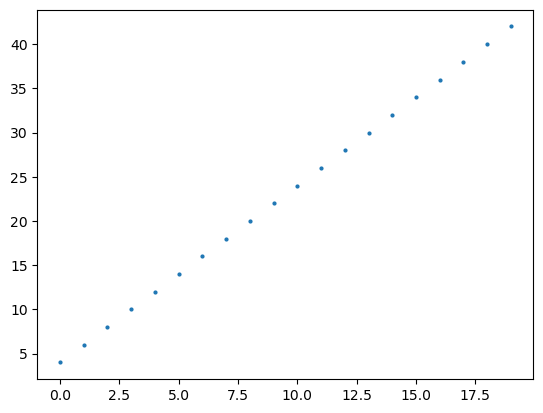

In [4]:
plt.scatter(X,Y,s=4)

In [5]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float))

    def forward(self,x:torch.Tensor)->torch.Tensor:
            return self.weight *x + self.bias

In [6]:
torch.manual_seed(42)
model =LinearRegression()
model

LinearRegression()

In [7]:
model.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [8]:
len(X),len(Y)

(20, 20)

In [9]:
train_count = int(len(X) * 0.8)
print(train_count)
X_train,Y_train = X[:train_count],Y[:train_count]
X_test,Y_test = X[train_count:],Y[train_count:]
len(X_train),len(Y_train),len(X_test),len(Y_test)

16


(16, 16, 4, 4)

In [10]:
loss_func = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),lr = 0.02)
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
def plot_predictions(train_data=X_train,
                     train_label=Y_train,
                     test_data=X_test,
                     test_label=Y_test,
                     prediction=None):
    plt.figure(figsize=(10,7))

    plt.scatter(train_data,train_label,c="b",s=4,label="Training Data")
    plt.scatter(test_data,test_label,c="g",s=4,label="Test Data")

    if prediction is not None:
        plt.scatter(X_train,prediction,c="r",s=4,label="Prediction")

    plt.legend(prop={"size":14})
  

In [12]:
epochs = 500

epochs_counts = []
training_loss = []
testing_loss =[]

for epoch in range(epochs):
    model.train()
    Y_pred = model(X_train)
    loss = loss_func(Y_pred,Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_func(test_pred,Y_test)
        model.eval()
        epochs_counts.append(epoch)
        training_loss.append(loss)
        testing_loss.append(test_loss)
    
print(f"Epoch :{epoch} | Loss :{loss} \n{model.state_dict()}")

Epoch :499 | Loss :0.4221569001674652 
OrderedDict({'weight': tensor([2.1242]), 'bias': tensor([3.7913])})


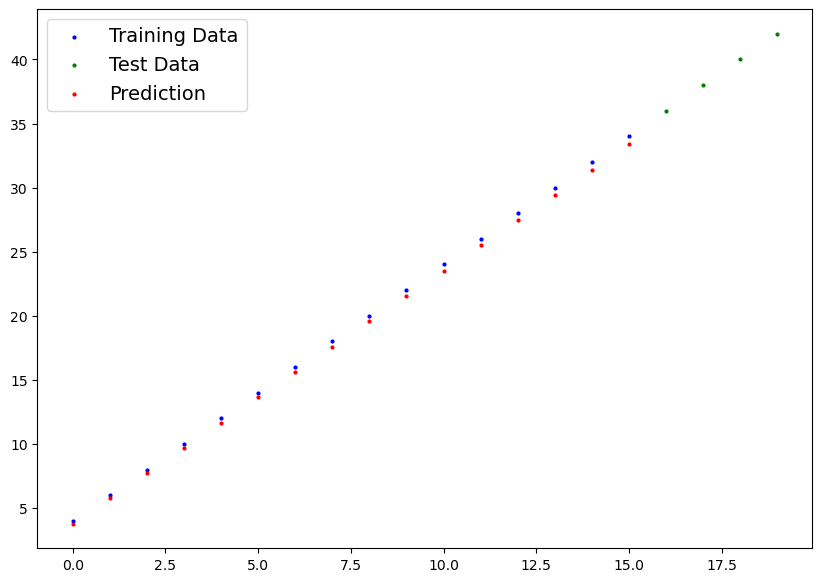

In [13]:
plot_predictions(prediction=Y_pred.detach().numpy())

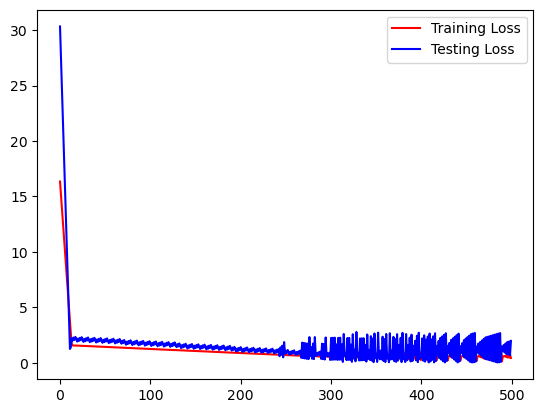

In [14]:
plt.plot(epochs_counts,torch.tensor(training_loss).numpy(),c="r",label="Training Loss")
plt.plot(epochs_counts,torch.tensor(testing_loss).numpy(),c="b",label="Testing Loss")
plt.legend()
plt.show()


In [15]:
torch.tensor(testing_loss).numpy().min()
epochs_counts[11]

11